In [33]:
from time import time
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('Tamil_first_ready_for_sentiment.csv', sep='\t')
df.rename(columns = {'Negative ':'sentiment',
                              ' Enna da ellam avan seyal  Mari iruku':'comment'},
                              inplace = True)

In [5]:
import string

#defining the function to remove punctuation
def remove_punctuation(text):
    
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_comment']= df['comment'].apply(lambda x:remove_punctuation(x))

df.head()

df['comment_lower']= df['clean_comment'].apply(lambda x: x.lower())

#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['comment_tokenied'] = df['comment_lower'].apply(lambda x: tokenization(x))

df['comment_tokenied'][:5]

import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df['no_stopwords']= df['comment_tokenied'].apply(lambda x:remove_stopwords(x))

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

df['comment_stemmed'] = df['no_stopwords'].apply(lambda x: stemming(x))

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df['comment_lemmatized'] = df['no_stopwords'].apply(lambda x:lemmatizer(x))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,sentiment,comment,clean_comment,comment_lower,comment_tokenied,no_stopwords,comment_stemmed,msg_lemmatized,comment_lemmatized
0,Negative,This movei is just like ellam avan seyal,This movei is just like ellam avan seyal,this movei is just like ellam avan seyal,[ this movei is just like ellam avan seyal],[ this movei is just like ellam avan seyal],[ this movei is just like ellam avan sey],[ this movei is just like ellam avan seyal],[ this movei is just like ellam avan seyal]
1,Positive,Padam vanthathum 13k dislike pottavaga yellam...,Padam vanthathum 13k dislike pottavaga yellam...,padam vanthathum 13k dislike pottavaga yellam...,[ padam vanthathum 13k dislike pottavaga yella...,[ padam vanthathum 13k dislike pottavaga yella...,[ padam vanthathum 13k dislike pottavaga yella...,[ padam vanthathum 13k dislike pottavaga yella...,[ padam vanthathum 13k dislike pottavaga yella...
2,Positive,Neraya neraya neraya... ... V era level...thala,Neraya neraya neraya V era levelthala,neraya neraya neraya v era levelthala,[ neraya neraya neraya v era levelthala],[ neraya neraya neraya v era levelthala],[ neraya neraya neraya v era levelthala],[ neraya neraya neraya v era levelthala],[ neraya neraya neraya v era levelthala]
3,Positive,wow thavala sema mass....padam oru pundaikum ...,wow thavala sema masspadam oru pundaikum aagathu,wow thavala sema masspadam oru pundaikum aagathu,[ wow thavala sema masspadam oru pundaikum aag...,[ wow thavala sema masspadam oru pundaikum aag...,[ wow thavala sema masspadam oru pundaikum aag...,[ wow thavala sema masspadam oru pundaikum aag...,[ wow thavala sema masspadam oru pundaikum aag...
4,Negative,Andha 19 k unlike panavangaluku kolandha pora...,Andha 19 k unlike panavangaluku kolandha pora...,andha 19 k unlike panavangaluku kolandha pora...,[ andha 19 k unlike panavangaluku kolandha por...,[ andha 19 k unlike panavangaluku kolandha por...,[ andha 19 k unlike panavangaluku kolandha por...,[ andha 19 k unlike panavangaluku kolandha por...,[ andha 19 k unlike panavangaluku kolandha por...


In [22]:
X = df['comment_lemmatized_new']
y = df['sentiment']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [24]:
 # Extracting features from the training data using a sparse vectorizer
vectorizer = TfidfVectorizer(
    sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")

In [25]:
# Python program to convert a list to string

# Function to convert


def listToString(s):

	# initialize an empty string
	str1 = ""

	# traverse in the string
	for ele in s:
		str1 += ele

	# return string
	return str1

df['comment_lemmatized_new']= df['comment_lemmatized'].apply(lambda x: listToString(x))

In [26]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [28]:
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

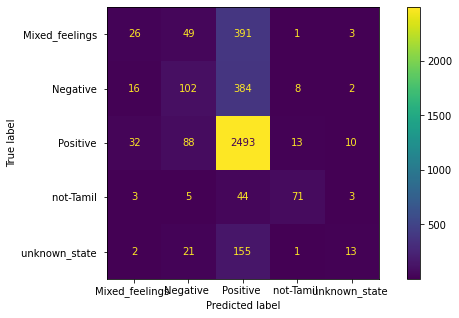

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)


In [32]:
def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [35]:
results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # L2 penalty Linear SGD
    (
        SGDClassifier(
            loss="squared_hinge", alpha=1e-4, n_iter_no_change=3, early_stopping=True
        ),
        "log-loss SGD",
    ),
    # NearestCentroid (aka Rocchio classifier)
    (NearestCentroid(), "NearestCentroid"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression(C=5, max_iter=1000)
train time: 8.01s
test time:  0.000995s
accuracy:   0.671
dimensionality: 2082
density: 1.0


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sparse_cg')
train time: 0.187s
test time:  0.00107s
accuracy:   0.687
dimensionality: 2082
density: 1.0


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.0231s
test time:  1.1s
accuracy:   0.674

Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 10.7s
test time:  0.465s
accuracy:   0.681

Linear SVC
________________________________________________________________________________
Training: 
LinearSVC(C=0.1, dual=False)
train t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


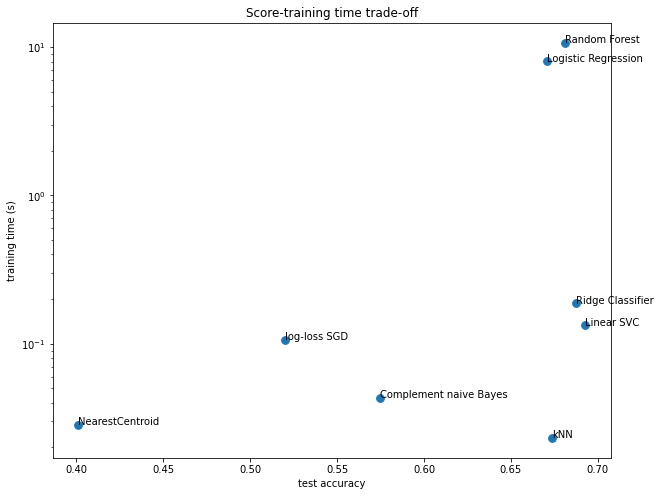

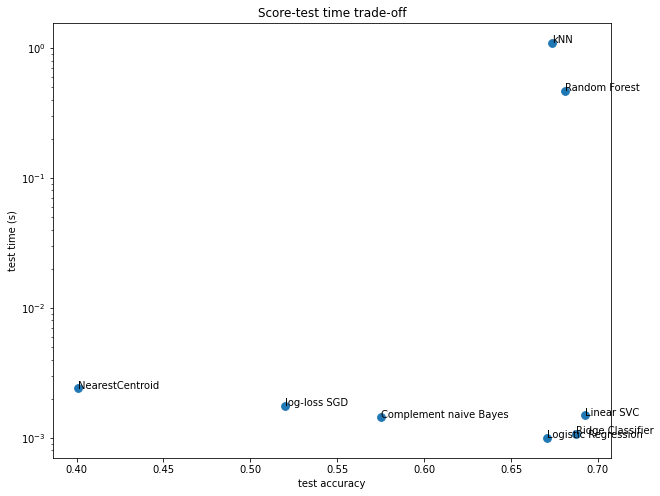

In [36]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time)
test_time = np.array(test_time)

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))